## I - TRAIN AN IMAGE CLASSIFIER 

This tutorial is based on Keras documentaion

In [5]:
#DO SOME IMPORTS
import os
import os.path as op
from os.path import expanduser
from keras.preprocessing import image
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras import backend as K
K.set_image_dim_ordering('th')
from keras.utils import plot_model
import matplotlib.pyplot as plt
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [29]:
root_dir = expanduser(".")
model_root_dir = op.join (root_dir,"models" )
model_path = op.join (model_root_dir, "final")
checkpoint_path = op.join (model_root_dir, "model.{epoch:02d}-{loss:.2f}.hdf5")


### LOAD DATA #data downoaded from  https://www.kaggle.com/datasets

In [4]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('data/train/0/0.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='data/preview', save_prefix='0', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

### BUILD MODEL

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 150, 150)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
#the model so far outputs 3D feature maps (height, width, features)
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [30]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True) 
#img = load_img('model.png')
#img.show()
#model.summary()

### NET PARAMETERS

In [8]:
batch_size = 512
nb_train_samples = 24198
nb_validation_samples = 802
nb_epoch = 60

In [31]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255, # normalize pixel values to [0,1]
        shear_range=0.2,# randomly applies shearing transformation
        zoom_range=0.2,# randomly applies shearing transformation
        horizontal_flip=True)# randomly flip the images

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 24198 images belonging to 2 classes.
Found 802 images belonging to 2 classes.


### TRAIN MODEL and SAVE MODEL

In [13]:
#history = model.fit_generator(
    #    train_generator,
     #   steps_per_epoch=2000 // batch_size,
     #   epochs=nb_epoch,
      #  validation_data=validation_generator,
      #  validation_steps=800 // batch_size,
       # callbacks = [ModelCheckpoint(checkpoint_path)])
#model.save(model_path)  
#model.save(model_path)#weights_path)

Epoch 1/60
3/3 [==============================] - 270s - loss: 0.6715 - acc: 0.5716 - val_loss: 0.6677 - val_acc: 0.6211
Epoch 2/60
3/3 [==============================] - 251s - loss: 0.6777 - acc: 0.6022 - val_loss: 0.6673 - val_acc: 0.6348
Epoch 3/60
3/3 [==============================] - 249s - loss: 0.6927 - acc: 0.5456 - val_loss: 0.6805 - val_acc: 0.5898
Epoch 4/60
3/3 [==============================] - 251s - loss: 0.6770 - acc: 0.5892 - val_loss: 0.6592 - val_acc: 0.6523
Epoch 5/60
3/3 [==============================] - 256s - loss: 0.6766 - acc: 0.5794 - val_loss: 0.6643 - val_acc: 0.6465
Epoch 6/60
3/3 [==============================] - 256s - loss: 0.6636 - acc: 0.5957 - val_loss: 0.6591 - val_acc: 0.6191
Epoch 7/60
3/3 [==============================] - 253s - loss: 0.6668 - acc: 0.5924 - val_loss: 0.6622 - val_acc: 0.5957
Epoch 8/60
3/3 [==============================] - 256s - loss: 0.6705 - acc: 0.5807 - val_loss: 0.6561 - val_acc: 0.6406
Epoch 9/60
3/3 [================

### LOADING THE TRAINING MODEL

In [22]:
model.load_weights('./models/model.57-0.65.hdf5')

### VISUALIZATION OF THE TRAINING HISTORY

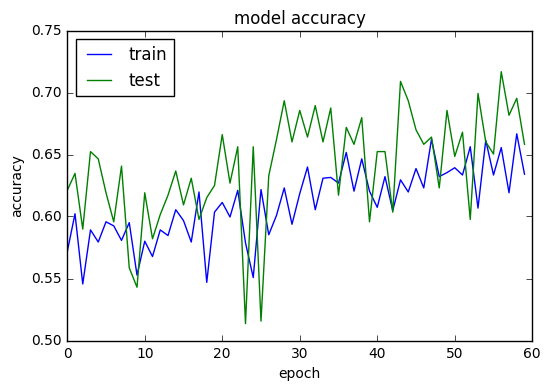

In [15]:
##summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('accuracy.pdf')

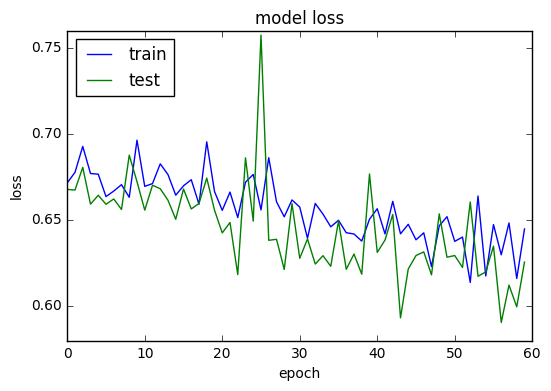

In [24]:
#### summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('loss.pdf')

### Evaluating on test set

In [1]:
#model.evaluate_generator(validation_generator, nb_validation_samples)

## II- Use pre-trained models

In [3]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input, decode_predictions

Using TensorFlow backend.


In [33]:
#vgg16
vgg16_feature_extract = VGG16(weights='imagenet', include_top=True)
plot_model(vgg16_feature_extract, to_file='vgg16.png', show_shapes=True, show_layer_names=True) 
img = load_img('vgg16.png')
img.show()
#vgg16_feature_extract.summary()

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/keras/applications/vgg16.py:184: UserWarning: You are using the TensorFlow backend, yet you are using the Theano image data format convention (`image_data_format="channels_first"`). For best performance, set `image_data_format="channels_last"` in your Keras config at ~/.keras/keras.json.
  warnings.warn('You are using the TensorFlow backend, yet you '


In [39]:
#vgg19
vgg19_feature_extract = VGG19(weights='imagenet', include_top=True)
plot_model(vgg19_feature_extract, to_file='vgg19.png', show_shapes=True, show_layer_names=True) 
img = load_img('vgg19.png')
img.show()
#vgg19_feature_extract.summary()

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/keras/applications/vgg19.py:187: UserWarning: You are using the TensorFlow backend, yet you are using the Theano image data format convention (`image_data_format="channels_first"`). For best performance, set `image_data_format="channels_last"` in your Keras config at ~/.keras/keras.json.
  warnings.warn('You are using the TensorFlow backend, yet you '


In [9]:
#resnet
resnet_feature_extract = ResNet50(weights='imagenet', include_top=True)
plot_model(resnet_feature_extract, to_file='resnet.png', show_shapes=True, show_layer_names=True) 
img = load_img('resnet.png')
img.show()
#resnet_feature_extract.summary()

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/keras/applications/resnet50.py:274: UserWarning: You are using the TensorFlow backend, yet you are using the Theano image data format convention (`image_data_format="channels_first"`). For best performance, set `image_data_format="channels_last"` in your Keras config at ~/.keras/keras.json.
  warnings.warn('You are using the TensorFlow backend, yet you '


## CLASSIFY NEW IMAGES

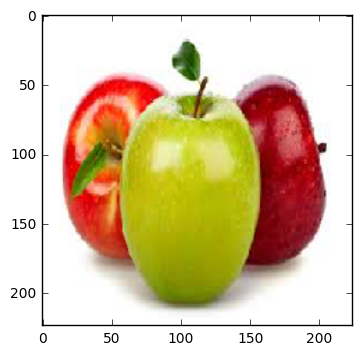

In [12]:
img = image.load_img('test.jpg', target_size=(224, 224))
img1 = image.load_img('cat.jpg', target_size=(224, 224))
img2 = image.load_img('dog.jpg', target_size=(224, 224))

%matplotlib inline
plt.imshow(img)

In [13]:
#img = image.load_img('elephant.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
#preds = vgg16_feature_extract.predict(x)
#preds = vgg19_feature_extract.predict(x)
preds = resnet_feature_extract.predict(x)
decode_predictions(preds, top=5)[0]

[('n07742313', 'Granny_Smith', 0.63401741),
 ('n07720875', 'bell_pepper', 0.20322706),
 ('n07745940', 'strawberry', 0.091240577),
 ('n07749582', 'lemon', 0.016961943),
 ('n07753592', 'banana', 0.010906833)]